# Brain MRI Images for Brain Tumor with CNN 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

### One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

## Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

### Images with tumor

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/ashraful/Dropbox/deep_learning_project/MRI_brain/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

### Images with no tumor

In [4]:
paths = []
for r, d, f in os.walk(r"/Users/ashraful/Dropbox/deep_learning_project/MRI_brain/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

## Splitting the data for training and testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
print('Train Images Shape', x_train.shape)
print('Train Labels Shape', y_train.shape)
print('Test Images Shape', x_test.shape)
print('Test Labels Shape', y_test.shape)

Train Images Shape (111, 128, 128, 3)
Train Labels Shape (111, 2)
Test Images Shape (28, 128, 128, 3)
Test Labels Shape (28, 2)


## Model Building

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



# Add Dense layers on top
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
print(model.summary())

2021-12-17 22:00:22.340731: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
# train the model
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 3s 977ms/step - loss: 13.5241 - accuracy: 0.6396 - val_loss: 119.4866 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 3s 864ms/step - loss: 14.3972 - accuracy: 0.6937 - val_loss: 11.4376 - val_accuracy: 0.6786
Epoch 3/30
3/3 [==============================] - 3s 859ms/step - loss: 4.7686 - accuracy: 0.7748 - val_loss: 19.1780 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 3s 896ms/step - loss: 4.2539 - accuracy: 0.8468 - val_loss: 12.4209 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 3s 938ms/step - loss: 1.4126 - accuracy: 0.9459 - val_loss: 8.4462 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 3s 912ms/step - loss: 2.2107 - accuracy: 0.9099 - val_loss: 6.0016 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 3s 905ms/step - loss: 0.7318 - accuracy: 0.9550 - val_loss: 3.8672 - val_accuracy: 0.7143
Epoch 8/30
3/

## Checking the model prediction

In [11]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


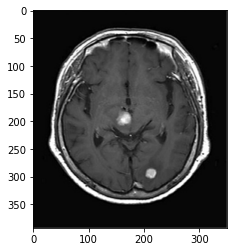

In [12]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/ashraful/Dropbox/deep_learning_project/MRI_brain/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


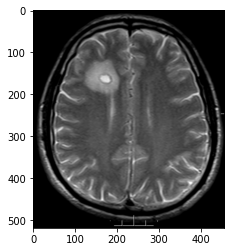

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/ashraful/Dropbox/deep_learning_project/MRI_brain/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

## Evaluate the model

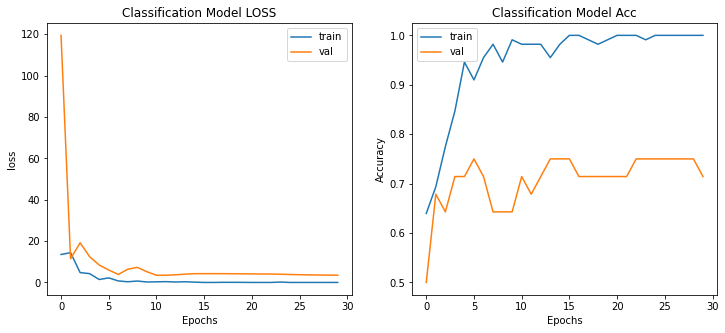

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title("Classification Model LOSS");
plt.ylabel("loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 3.5038 - accuracy: 0.7143 - 149ms/epoch - 149ms/step


In [16]:
print(test_acc)

0.7142857313156128
